## Introducción a la Inteligencia Artificial

##### _Microproyecto 2 - Clustering_


### **Integrantes equipo 15**

Julián Orrego Martínez

---
Stefany Cantero Cardenas

---
Laura Melissa Neira

---

# Deforestación en países latinoamericanos

Importamos las librerías necesarias para trabajar con el dataset:

In [5]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
from tabulate import tabulate 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (25, 12)
plt.style.use('ggplot')

# 1. Exploración y pre-procesamiento de los datos

Una vez cargado el conjunto de datos, se decide omitir la primera fila debido a que solo contiene el nombre del archivo y a partir de la segunda se encontraban las columnas con sus nombres correspondientes. Se realiza la limpieza de los datos eliminando las columnas con espacios vacios (NaN) y la última columna del dataset. Posteriormente, se convierten los valores de las columnas a partir de 1990 de string a float. Se prosigue filtrando el dataset para los países de interés, que son aquellos ubicados en Latinoamérica y el Caribe. Finalmente, se crean dos variables artificiales correspondientes al promedio entre 1990-2016 para cada país y el cambio neto durante los años.

In [6]:
# Carga del dataset
forest_area = pd.read_csv(r'Forest area (% of total land area).csv', skiprows=1)

In [7]:
# Visualización de los primeros registros
forest_area.head()

,HDI Rank (2018),Country,1990,Unnamed: 3,1995,Unnamed: 5,2000,Unnamed: 7,2005,Unnamed: 9,...,2012,Unnamed: 15,2013,Unnamed: 17,2014,Unnamed: 19,2015,Unnamed: 21,2016,Unnamed: 23
0,170,Afghanistan,2.1,NaN,2.1,NaN,2.1,NaN,2.1,NaN,...,2.1,NaN,2.1,NaN,2.1,NaN,2.1,NaN,2.1,a
1,69,Albania,28.8,NaN,28.4,NaN,28.1,NaN,28.6,NaN,...,28.3,NaN,28.2,NaN,28.2,NaN,28.2,NaN,28.1,a
2,82,Algeria,0.7,NaN,0.7,NaN,0.7,NaN,0.6,NaN,...,0.8,NaN,0.8,NaN,0.8,NaN,0.8,NaN,0.8,a
3,36,Andorra,34.0,NaN,34.0,NaN,34.0,NaN,34.0,NaN,...,34.0,NaN,34.0,NaN,34.0,NaN,34.0,NaN,34.0,a
4,149,Angola,48.9,NaN,48.4,NaN,47.9,NaN,47.4,NaN,...,46.7,NaN,46.6,NaN,46.5,NaN,46.4,NaN,46.3,a


In [8]:
# Visualización de los últimos registros
forest_area.tail()

,HDI Rank (2018),Country,1990,Unnamed: 3,1995,Unnamed: 5,2000,Unnamed: 7,2005,Unnamed: 9,...,2012,Unnamed: 15,2013,Unnamed: 17,2014,Unnamed: 19,2015,Unnamed: 21,2016,Unnamed: 23
208,,Small Island Developing States,68.4,NaN,68.5,NaN,68.7,NaN,68.9,NaN,...,69.1,NaN,69.3,NaN,69.3,NaN,69.4,NaN,69.4,NaN
209,,Organization for Economic Co-operation and Dev...,30.9,NaN,31.0,NaN,31.1,NaN,31.1,NaN,...,31.3,NaN,31.3,NaN,31.3,NaN,31.4,NaN,31.4,NaN
210,,World,32.3,NaN,31.9,NaN,31.7,NaN,31.5,NaN,...,31.3,NaN,31.3,NaN,31.3,NaN,31.2,NaN,31.2,NaN
211,a: This column is intentionally left without c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Visualización de la cantidad de datos
forest_area.shape

(213, 24)

In [10]:
# Eliminación de columnas vacías
forest_area = forest_area.dropna(axis=1, how='all')
forest_area.head()

,HDI Rank (2018),Country,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,Unnamed: 23
0,170,Afghanistan,2.1,2.1,2.1,2.1,2.1,2.1,2.1,2.1,2.1,2.1,2.1,a
1,69,Albania,28.8,28.4,28.1,28.6,28.3,28.3,28.3,28.2,28.2,28.2,28.1,a
2,82,Algeria,0.7,0.7,0.7,0.6,0.8,0.8,0.8,0.8,0.8,0.8,0.8,a
3,36,Andorra,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,a
4,149,Angola,48.9,48.4,47.9,47.4,46.9,46.8,46.7,46.6,46.5,46.4,46.3,a


In [11]:
# Eliminación de la última columna
forest_area = forest_area.drop(forest_area.columns[-1], axis=1)
forest_area.head()

,HDI Rank (2018),Country,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016
0,170,Afghanistan,2.1,2.1,2.1,2.1,2.1,2.1,2.1,2.1,2.1,2.1,2.1
1,69,Albania,28.8,28.4,28.1,28.6,28.3,28.3,28.3,28.2,28.2,28.2,28.1
2,82,Algeria,0.7,0.7,0.7,0.6,0.8,0.8,0.8,0.8,0.8,0.8,0.8
3,36,Andorra,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0
4,149,Angola,48.9,48.4,47.9,47.4,46.9,46.8,46.7,46.6,46.5,46.4,46.3


In [12]:
# Selección de filas los paises pertenecientes a la región de interés (América Latina)

# Lista de paises de América Latina
latam_and_caribbean_countries = [
    'Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize', 'Bolivia (Plurinational State of)', 'Brazil', 
    'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Ecuador', 'El Salvador', 
    'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 
    'Panama', 'Paraguay', 'Peru', 'Dominican Republic', 'Saint Lucia', 'Saint Kitts y Nevis', 
    'Saint Vincent and the Grenadines', 'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela (Bolivarian Republic of)'
]

# Filtrado del dataset basado en la lista de paises de América Latina
latam_and_cab_forest_area = forest_area[forest_area['Country'].isin(latam_and_caribbean_countries)]

In [13]:
# Resetear indices del nuevo dataset
latam_and_cab_forest_area = latam_and_cab_forest_area.reset_index(drop=True)
latam_and_cab_forest_area2 = latam_and_cab_forest_area.copy()

In [14]:
# Visualización de los primeros registros luego del filtrado
latam_and_cab_forest_area.loc[:]

,HDI Rank (2018),Country,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016
0,74,Antigua and Barbuda,23.4,23.1,22.7,22.3,22.3,22.3,22.3,22.3,22.3,22.3,22.3
1,48,Argentina,12.7,12.2,11.6,11.0,10.4,10.3,10.2,10.1,10.0,9.9,9.8
2,60,Bahamas,51.4,51.4,51.4,51.4,51.4,51.4,51.4,51.4,51.4,51.4,51.4
3,56,Barbados,14.7,14.7,14.7,14.7,14.7,14.7,14.7,14.7,14.7,14.7,14.7
4,103,Belize,70.8,67.4,64.0,62.1,61.0,60.8,60.6,60.3,60.1,59.9,59.7
5,114,Bolivia (Plurinational State of),58.0,56.7,55.5,54.2,51.9,51.6,51.4,51.1,50.8,50.6,50.3
6,79,Brazil,65.4,63.9,62.4,60.6,59.6,59.5,59.4,59.3,59.2,59.0,58.9
7,42,Chile,20.5,20.9,21.3,21.6,21.8,22.2,22.6,23.0,23.4,23.9,24.3
8,79,Colombia,58.1,56.9,55.7,54.3,52.8,52.8,52.8,52.8,52.8,52.7,52.7
9,68,Costa Rica,50.2,48.4,46.5,48.8,51.0,51.6,52.2,52.8,53.4,54.0,54.6


In [15]:
# Convertir las columnas [2:] a tipo numérico
latam_and_cab_forest_area = latam_and_cab_forest_area.apply(pd.to_numeric, errors='coerce').copy()

In [16]:
# Verificación de la cantidad de datos luego del filtrado
latam_and_cab_forest_area.shape

(32, 13)

##### Creación de dos variables artificiales para realizar el análisis de los datos:

In [17]:
# Creación de la variable avg_per_country 

latam_and_cab_forest_area['avg_per_country'] = latam_and_cab_forest_area.iloc[:, 2:].mean(axis=1)

print(latam_and_cab_forest_area['avg_per_country'])

0     22.509091
1     10.745455
2     51.400000
3     14.700000
4     62.427273
5     52.918182
6     60.654545
7     22.318182
8     54.036364
9     51.227273
10    26.736364
11    60.481818
12    35.672727
13    51.918182
14    14.427273
15    50.000000
16    36.190909
17    84.209091
18     3.736364
19    49.890909
20    31.218182
21    34.472727
22    28.536364
23    63.818182
24    43.718182
25    58.727273
26    34.045455
27    67.936364
28    98.481818
29    45.354545
30     9.027273
31    54.481818
Name: avg_per_country, dtype: float64


In [18]:
# Creación de la variable net_change_per_country
latam_and_cab_forest_area['net_change_per_country'] = latam_and_cab_forest_area.iloc[:, -1] - latam_and_cab_forest_area.iloc[:, 2]

print(latam_and_cab_forest_area['net_change_per_country'])

0    -8.909091e-01
1    -1.954545e+00
2    -1.421085e-14
3     0.000000e+00
4    -8.372727e+00
5    -5.081818e+00
6    -4.745455e+00
7     1.818182e+00
8    -4.063636e+00
9     1.027273e+00
10    7.536364e+00
11   -6.218182e+00
12    1.277273e+01
13   -8.818182e-01
14   -3.772727e+00
15    0.000000e+00
16   -8.109091e+00
17   -3.909091e-01
18   -4.636364e-01
19   -2.280909e+01
20   -5.818182e-01
21   -1.427273e+00
22   -8.963636e+00
23   -3.981818e+00
24   -9.581818e+00
25   -2.172727e+00
26   -1.654545e+00
27    3.836364e+00
28   -4.181818e-01
29   -1.545455e+00
30    4.427273e+00
31   -4.518182e+00
Name: net_change_per_country, dtype: float64


# 2. Establecimiento de número de clústeres del conjunto de datos

##### Elegimos tres variables para implementar las técnicas de Curva de codo, Estadístico de gap y Análisis de la Silueta.

In [19]:
forest_area_3V = np.array(latam_and_cab_forest_area[['HDI Rank (2018)', 'avg_per_country', 'net_change_per_country']])
forest_area_labels = np.array(latam_and_cab_forest_area['Country'])

### **Método 1. Curva de codo**

In [20]:
# Se define la cantidad de clusters con los que se quiere probar
max_clusters = 10

In [21]:
def elbow_curve(data, max_clusters):

    # rango de valores del parámetro a optimizar (cantidad de clusters)
    max_clusters = range(1, max_clusters + 1)
    inertias = []

    # se ejecuta el modelo para el rango de clusters y se guarda la inercia
    # respectiva obtenida para cada valor
    for k in max_clusters:
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(forest_area_3V)
        inertias.append(kmeans_model.inertia_)

    # Grafico de los resultados obtenidos para cada valor del rango
    print("Valores: ", inertias)
    plt.figure(figsize=(10, 8))
    plt.plot(max_clusters, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

Valores:  [39973.85550619834, 25516.00847260483, 15593.594557916826, 10200.905057064145, 8563.320820060104, 5904.277130394856, 4985.984498622589, 4509.892091368229, 3077.2432598714413, 2577.506986225895]


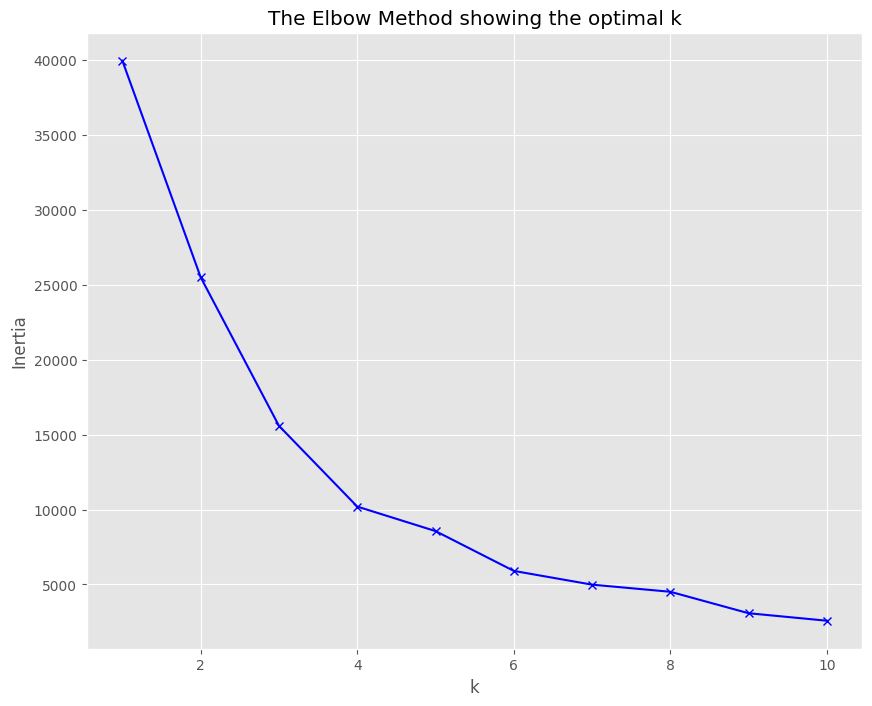

In [22]:
elbow_curve(forest_area_3V, max_clusters)

#### En el gráfico se evidencia que a partir de k = 3 no hay una mejoría signficativa en la reducción de la variación de la inercia. Así, la cantidad óptima de clusters, según este método, es 3.

### **Método 2. Estadístico de GAP**

In [23]:
# nrefs es la cantidad de datos ("datasets") de referencia contra los que se va a comparar
def optimalK(data, nrefs=3, max_clusters=15):

    gaps = np.zeros((len(range(1, max_clusters+1)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, max_clusters+1)):

        # guardara los resultados de dispersión de cada distribución simulada
        refDisps = np.zeros(nrefs)

        # Genera las muestras aleatorias indicadas con nrefs y ejecuta k-means
        # en cada bucle obteniendo los resultados de dispersión (inercia)
        # para cada conjunto generado.
        for i in range(nrefs):
            
            # Crea nuevo conjunto aleatorio de referencia
            # Se puede usar una semilla para tener reproducibilidad
            np.random.seed(0)
            randomReference = np.random.random_sample(size=data.shape)
            
            # se ajusta el modelo al conjunto de referencia
            km = KMeans(k)
            km.fit(randomReference)
            # se guarda la dispersión obtenida
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Se ajusta el modelo a los datos originales y se guarda su inercia
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calcula el estadístico de gap para k clusters usando el promedio de
        # las dispersiones de los datos simulados y la dispersión de los datos originales.
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Guarda el estadístico de gap obtenido en este bucle.
        gaps[gap_index] = gap
        new_row = pd.DataFrame({'clusterCount': [k], 'gap': [gap]})
        resultsdf = pd.concat([resultsdf, new_row], ignore_index=True)

    # Selecciona el "primer máximo" de los estadísticos obtenidos y devuelve 
    # su respectivo número de clusters    
    for i in range(0, len(gaps)-1):
        if gaps[i+1] <= gaps[i]:
            return (i+1, resultsdf)
    return (len(gaps), resultsdf)
    #return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

In [24]:
k, gapdf = optimalK(forest_area_3V, nrefs=5, max_clusters=10)

Text(0.5, 1.0, 'Gap Statistic vs. K')

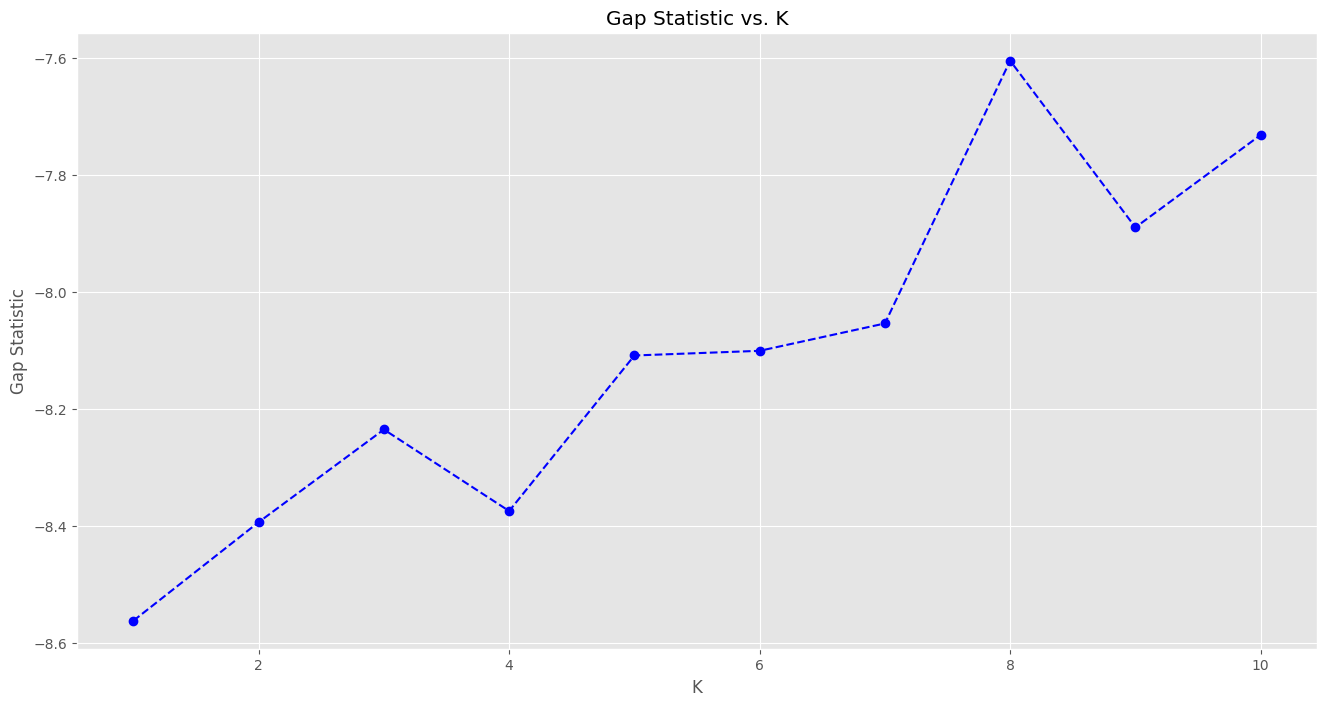

In [25]:
# Gráfica de los resultados obtenidos
plt.figure(figsize=(16,8))
plt.plot(gapdf['clusterCount'], gapdf['gap'], linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs. K')

#### En el gráfico podemos observar que la tendencia general es que el valor del Estadístico de GAP tiende a aumentar proporcionalmente con k lo que sugiere una mejor separación de los datos. Los valores más altos se observan en los picos k = 3 y k = 8, lo que sugiere que estos podrían ser los números óptimos de clusters. Se elige k = 3 al ser el primer valor más alto.

### **Método 3. Coeficiente de Silueta**

For n_clusters = 2 The average silhouette_score is : 0.34348780250707567
For n_clusters = 3 The average silhouette_score is : 0.29738226816588176
For n_clusters = 5 The average silhouette_score is : 0.2991951509965346
For n_clusters = 6 The average silhouette_score is : 0.3754141344799191
For n_clusters = 8 The average silhouette_score is : 0.4012726807176151


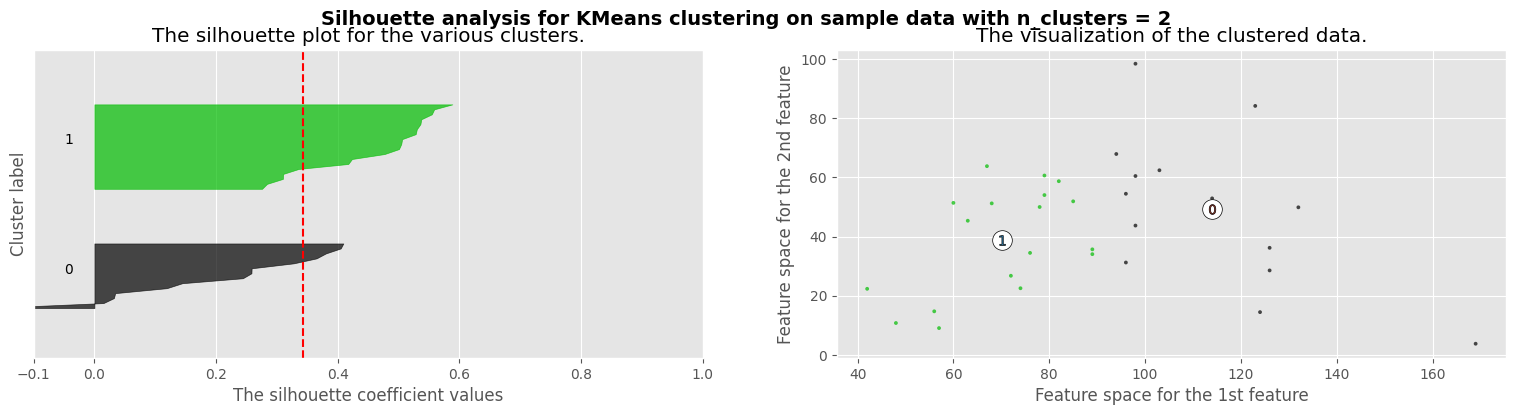

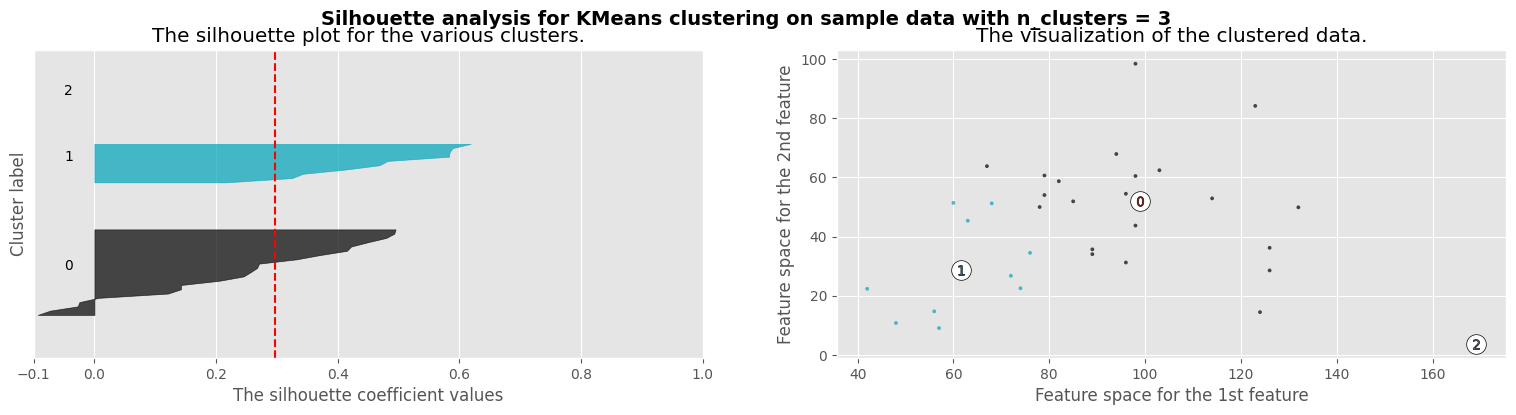

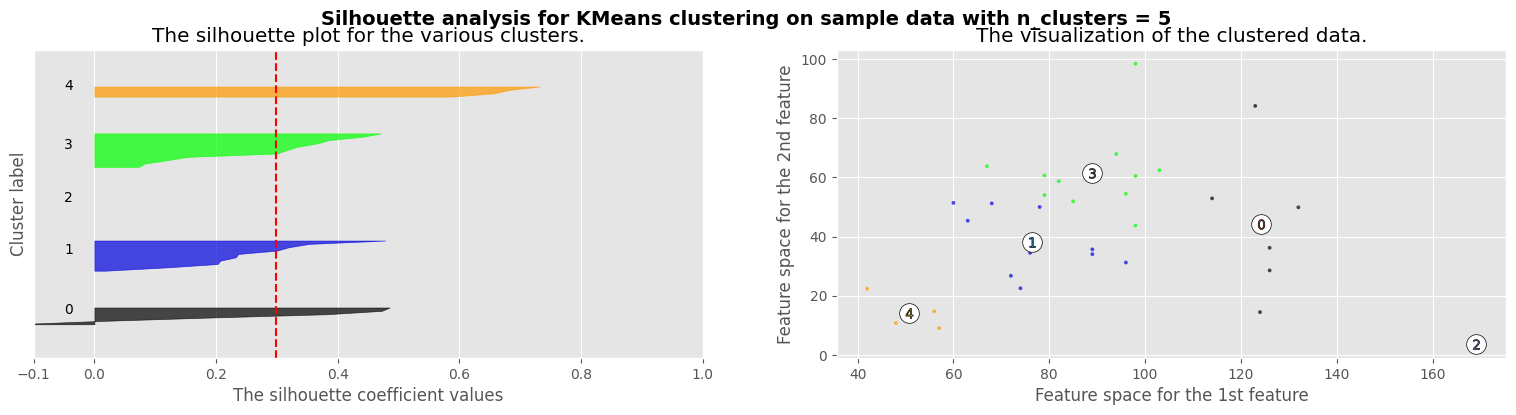

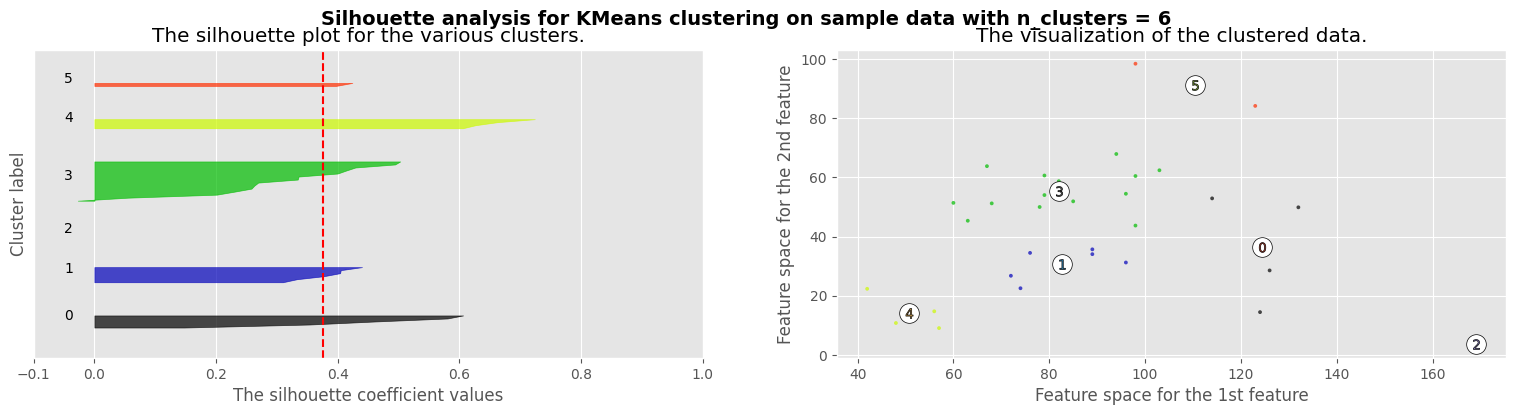

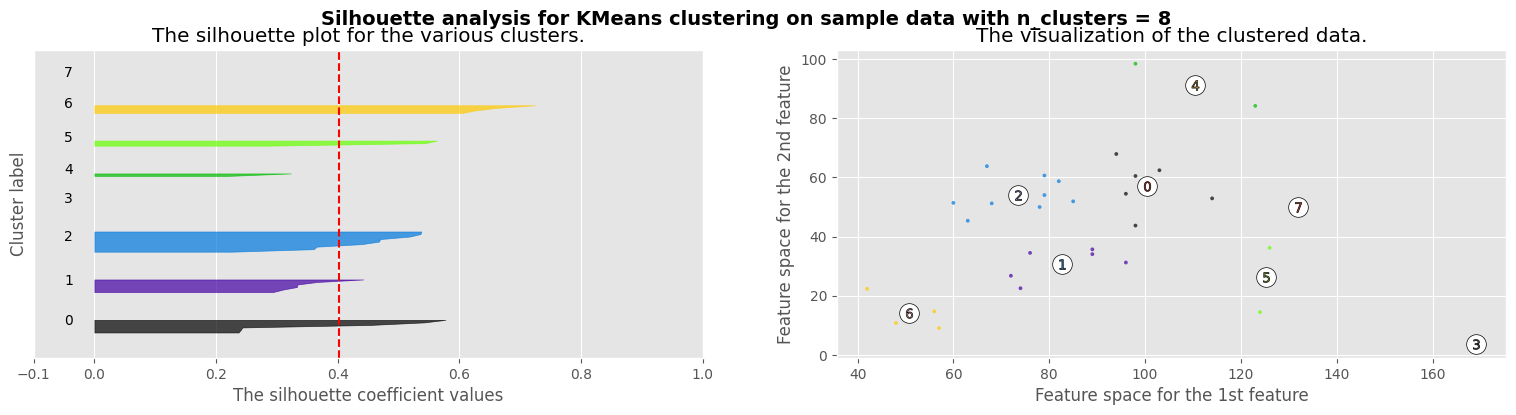

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

colors_k_means = ['cyan','purple','orange', 'blue', 'green', 'yellow', 'red', 'black', 'brown']
range_n_clusters = [2,3,5,6,8]
X = forest_area_3V

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(19, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')

plt.show()

#### Una vez realizados los cálculos para el Coeficiente de Silueta, obtenemos los dos puntajes más altos para k = 6 y k = 8, 0.40127268071761496 y 0.359752283315393, respectivamente.

#### Finalmente, elegimos k = 3 como el valor para implementar K-Means debido a que el conjunto de datos con el que se está trabajando es pequeño y una cantidad mayor de clusters implicaría una distribución más desbalanceada de los datos.

Implementación de K-Means
---

In [27]:
n_clusters = 3
kmeans_model_3D = KMeans(n_clusters, max_iter=1000).fit(forest_area_3V)
forest_area_labels = kmeans_model_3D.labels_
centroids_3D = kmeans_model_3D.cluster_centers_

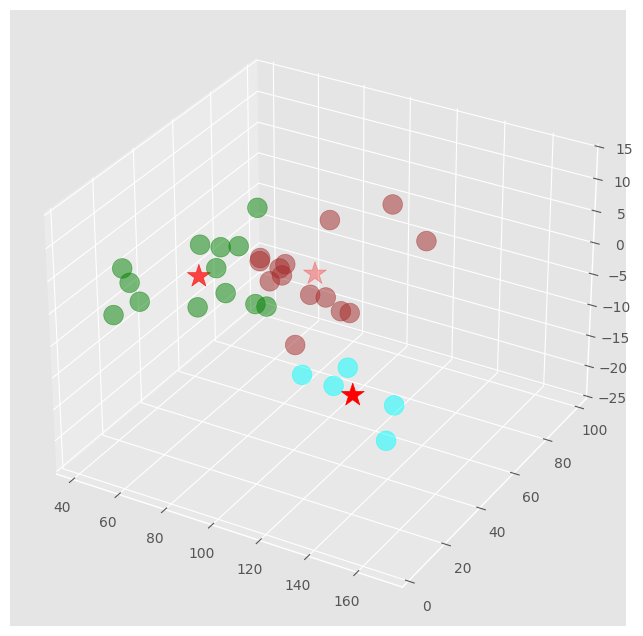

In [28]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(forest_area_3V[:, 0], forest_area_3V[:, 1], forest_area_3V[:, 2], c=forest_area_labels, s=200,
        cmap=matplotlib.colors.ListedColormap(colors_k_means), alpha=0.5)
ax.scatter(centroids_3D[:, 0], centroids_3D[:, 1], centroids_3D[:, 2], marker='*', c='r', s=300)

plt.show()


##### Utilización del modelo: clustering con 3 tres variables

In [29]:
# Clasificación usando 3 variables

forest_area_3V = np.array(latam_and_cab_forest_area[['HDI Rank (2018)', 'avg_per_country', 'net_change_per_country']])
forest_area_3V_labels = np.array(latam_and_cab_forest_area['Country'])
print(forest_area_3V.shape)

(32, 3)


##### Graficamos las tres características en un plano 3D para mejor visualización de los datos.

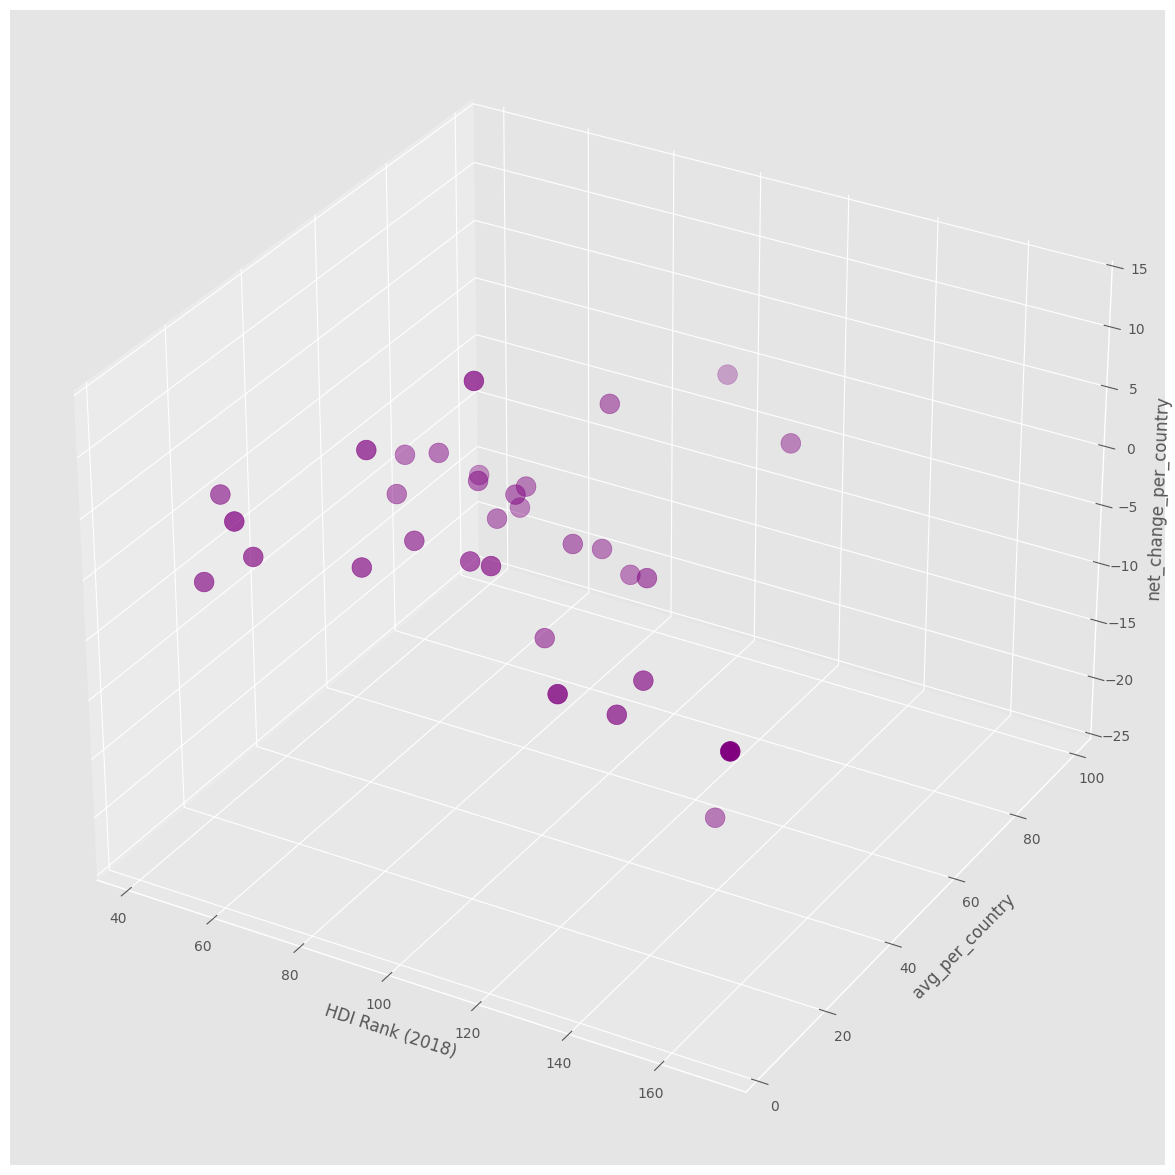

In [30]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
#ax = Axes3D(fig)
ax.scatter(forest_area_3V[:, 0], forest_area_3V[:, 1], forest_area_3V[:, 2], c='purple', s=200)
ax.set_xlabel('HDI Rank (2018)')
ax.set_ylabel('avg_per_country')
ax.set_zlabel('net_change_per_country')
plt.show()

In [31]:
# Normalización de los datos
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())

forest_area_3D=minmax_norm(forest_area_3V)
forest_area_3D

array([[0.50471586, 0.23626712, 0.11427082],
       [0.36916442, 0.1749372 , 0.10872553],
       [0.43172662, 0.38689037, 0.11891559],
       [0.41087255, 0.19555429, 0.11891559],
       [0.65590786, 0.44438125, 0.07526423],
       [0.71325655, 0.39480544, 0.09242144],
       [0.53078345, 0.43513911, 0.09417508],
       [0.33788331, 0.23527181, 0.12839471],
       [0.53078345, 0.4006351 , 0.09772975],
       [0.47343476, 0.38598986, 0.12427129],
       [0.49428883, 0.25830608, 0.15820655],
       [0.62984028, 0.43423859, 0.08649699],
       [0.58291862, 0.30489597, 0.18550642],
       [0.56206455, 0.38959192, 0.11431821],
       [0.76539172, 0.19413242, 0.09924641],
       [0.52556993, 0.37959145, 0.11891559],
       [0.77581876, 0.30759752, 0.0766387 ],
       [0.76017821, 0.55794113, 0.11687758],
       [1.        , 0.13839518, 0.11649841],
       [0.80709986, 0.3790227 , 0.        ],
       [0.61941324, 0.28167212, 0.11588227],
       [0.5151429 , 0.29863975, 0.11147448],
       [0.

In [32]:
#Ajustar modelo
kmeans_model = KMeans(n_clusters=3).fit(forest_area_3V)

#Labels del ajuste
forest_area_3F_labels = kmeans_model.labels_
print(forest_area_3F_labels)

[0 0 0 0 1 1 1 0 1 0 0 1 0 1 2 1 2 1 2 2 0 0 2 1 1 1 0 1 1 0 0 1]


In [33]:
# Vectores de los centroides
forest_area_3F_centroids = kmeans_model.cluster_centers_
print(forest_area_3F_centroids)

[[ 68.46153846  29.95594406   1.5020979 ]
 [ 92.42857143  61.70064935  -3.32792208]
 [135.4         26.55636364  -8.82363636]]


In [34]:
# Asignación de etiquetas al conjunto de datos
latam_forest_area = pd.DataFrame(forest_area_3V, columns=['HDI Rank (2018)', 'avg_per_country', 'net_change_per_country'])
latam_forest_area['cluster'] = forest_area_3F_labels
latam_forest_area.sample(10)

,HDI Rank (2018),avg_per_country,net_change_per_country,cluster
0,74.0,22.509091,-0.890909,0
16,126.0,36.190909,-8.109091,2
9,68.0,51.227273,1.027273,0
27,94.0,67.936364,3.836364,1
4,103.0,62.427273,-8.372727,1
14,124.0,14.427273,-3.772727,2
24,98.0,43.718182,-9.581818,1
8,79.0,54.036364,-4.063636,1
6,79.0,60.654545,-4.745455,1
10,72.0,26.736364,7.536364,0


# 3. Agrupamiento jerárquico a través de un dendrograma

### **Dendrograma con método ward**

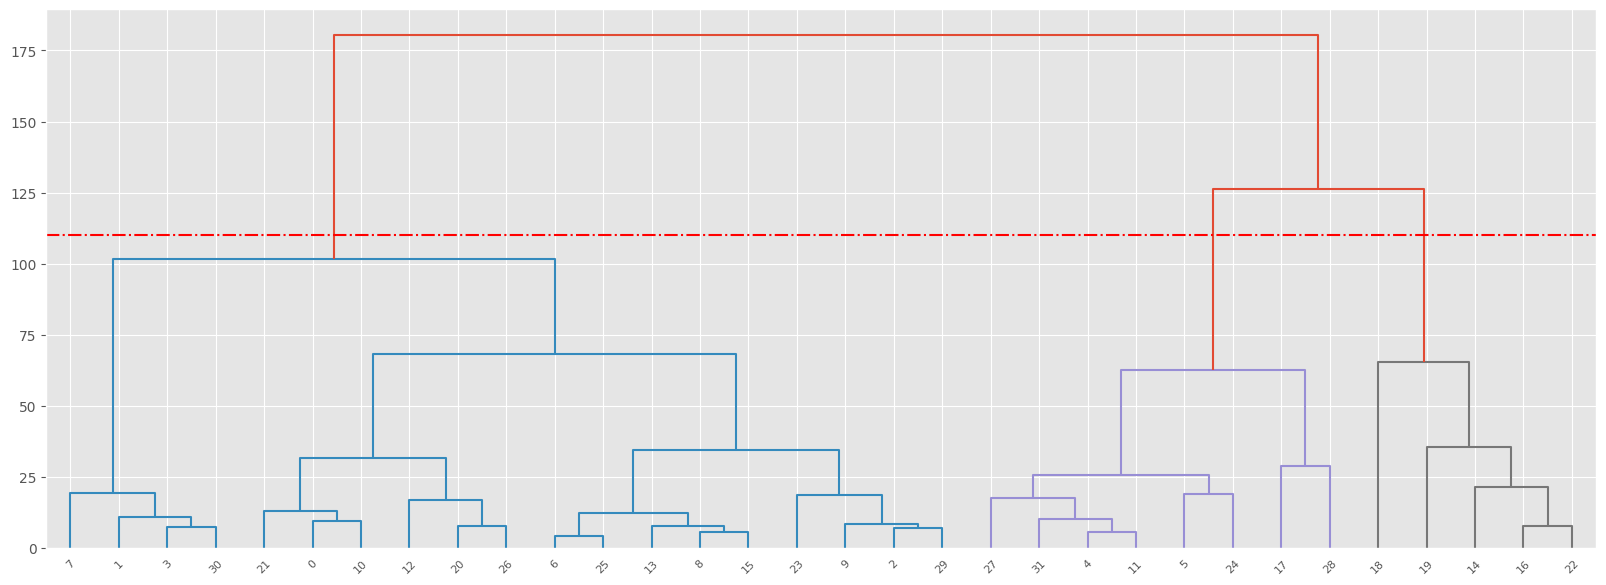

In [94]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

pyplot.figure(figsize=(20, 7))  
dend = shc.dendrogram(shc.linkage(forest_area_3V, method='ward'))
plt.axhline(y=110, color='r', linestyle='-.')
plt.show()

#### ***Observaciones principales***

Agrupación Jerárquica: Los países están agrupados en clústeres basados en la similitud de sus tasas de forestación. Los clústeres se forman a diferentes alturas, indicando niveles de similitud.

Línea de corte: Se traza una línea horizontal punteada roja que indica un umbral para definir los clústeres principales.

Similitud: Los países que se fusionan a menor altura tienen tasas más similares entre sí

Diversos clústeres: Se observan varios clústeres grandes, lo que sugiere que hay grupos de países con patrones de deforestación similares.

#### **Ajuste del modelo**

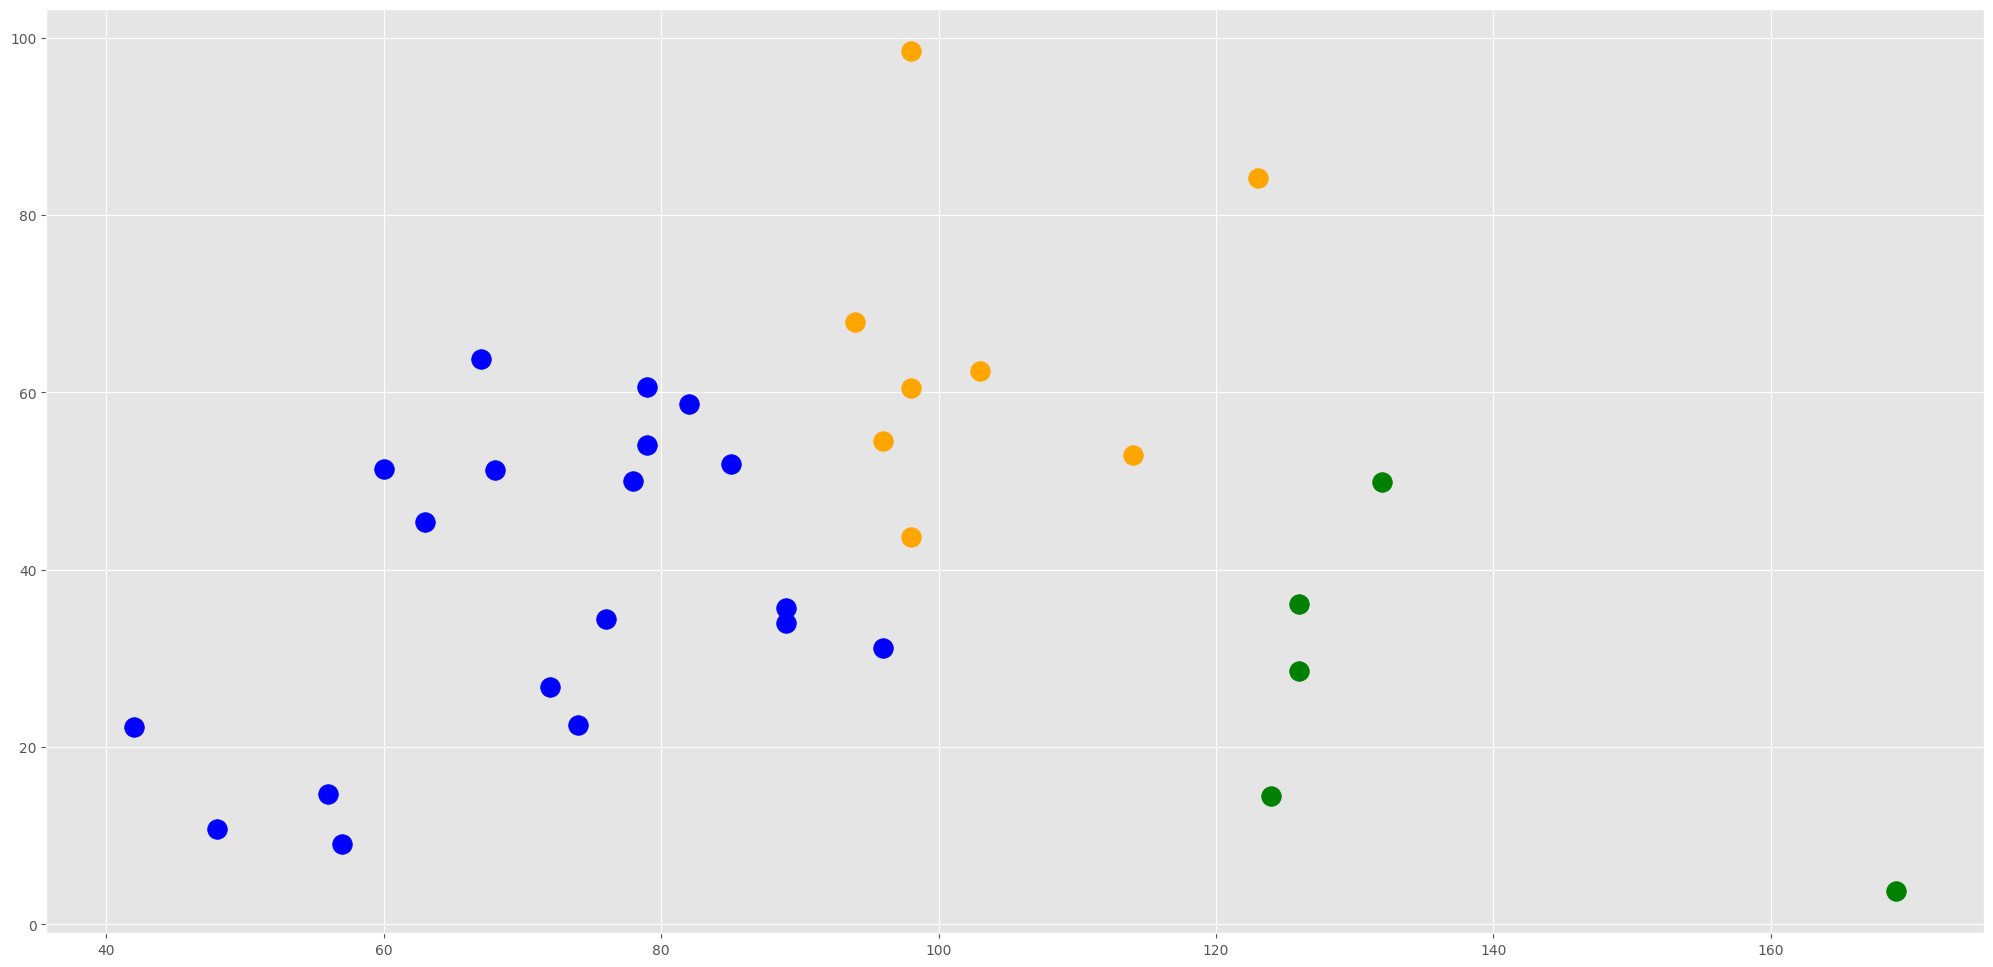

In [100]:
from sklearn.cluster import AgglomerativeClustering

model_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_model_ward = model_ward.fit_predict(forest_area_3V)
plt.scatter(forest_area_3V[y_model_ward == 0,0], forest_area_3V[y_model_ward == 0,1], s=200, c='blue')
plt.scatter(forest_area_3V[y_model_ward == 1,0], forest_area_3V[y_model_ward == 1,1], s=200, c='green')
plt.scatter(forest_area_3V[y_model_ward == 2,0], forest_area_3V[y_model_ward == 2,1], s=200, c='orange')
plt.show()

### **Dendrograma con método single**

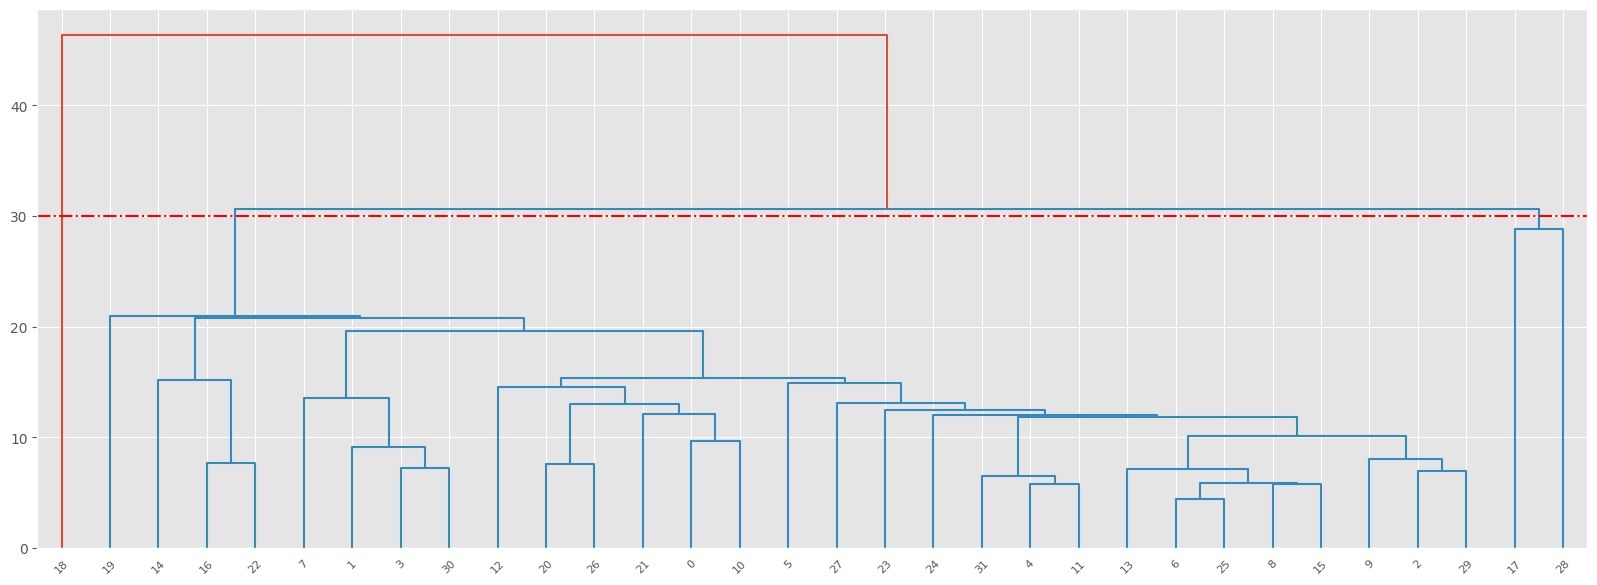

In [97]:
pyplot.figure(figsize=(20, 7))  
dend = shc.dendrogram(shc.linkage(forest_area_3V, method='single'))
plt.axhline(y=30, color='r', linestyle='-.')
plt.show()

#### ***Observaciones principales***
Método de Enlace Simple:Este método agrupa los datos basándose en la menor distancia entre puntos en diferentes clústeres

Línea de corte: La línea punteada roja indica el umbral para definir los clústeres principales.

Disimilitud: El eje vertical mide la distancia o disimilitud entre los grupos, mientras que el eje horizontal muestra los puntos de datos o clústeres.

Agrupamientos: Los clústeres se forman a diferentes alturas, lo que indica niveles de similitud entre los datos, en este caso se ven dos grupos con valores atípicos lo que indica la diferencia entre los demás datos, los cuales ayudan a identificar datos de interés en el análisis.

#### **Ajuste del modelo**

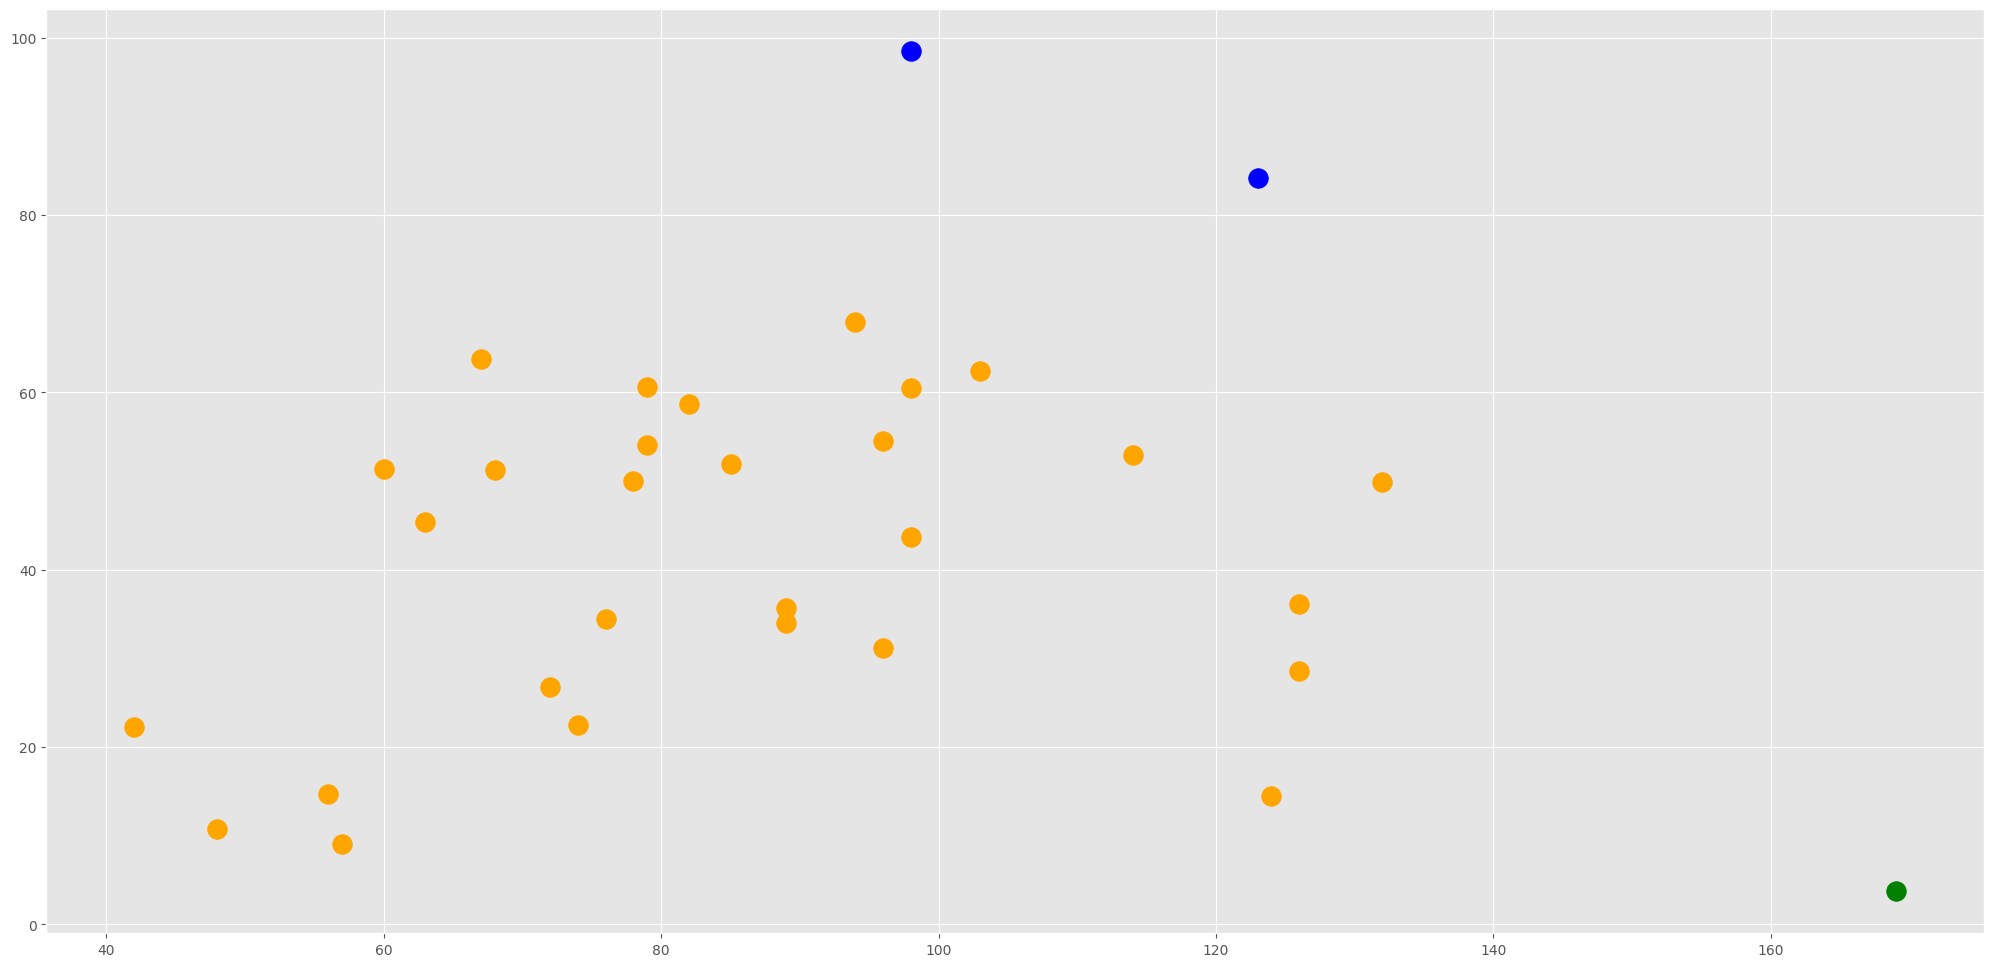

In [99]:
model_single = AgglomerativeClustering(n_clusters=3, linkage='single')
y_model_single = model_single.fit_predict(forest_area_3V)
plt.scatter(forest_area_3V[y_model_single == 0,0], forest_area_3V[y_model_single == 0,1], s=200, c='blue')
plt.scatter(forest_area_3V[y_model_single == 1,0], forest_area_3V[y_model_single == 1,1], s=200, c='green')
plt.scatter(forest_area_3V[y_model_single == 2,0], forest_area_3V[y_model_single == 2,1], s=200, c='orange')
plt.show()

#### ***Diferencias entre métodos de Clustering aglomerativo***

Con el método Ward se pueden identificar tres clústeres principales, los cuales agrupan los datos en función de la minimización de la variabilidad dentro de cada grupo. Esto permite encontrar similitudes entre las variables de los datos y formar clústeres más claros, facilitando la interpretación de la relación entre los grupos.

Por otro lado, el método Single, al enfocarse en las distancias más cortas entre los puntos de datos, muestra como el país con índice #18 y los países #17 y #28, aparecen en posiciones distantes en el dendrograma. Esto sugiere que estos países presentan características atípicas en comparación con el resto. Identificar estas diferencias es útil para comprender mejor  estos datos y poder extraer conclusiones más precisas.

### **Gráfica de comparación entre métodos de Clustering (K-means y Aglomerativo)**

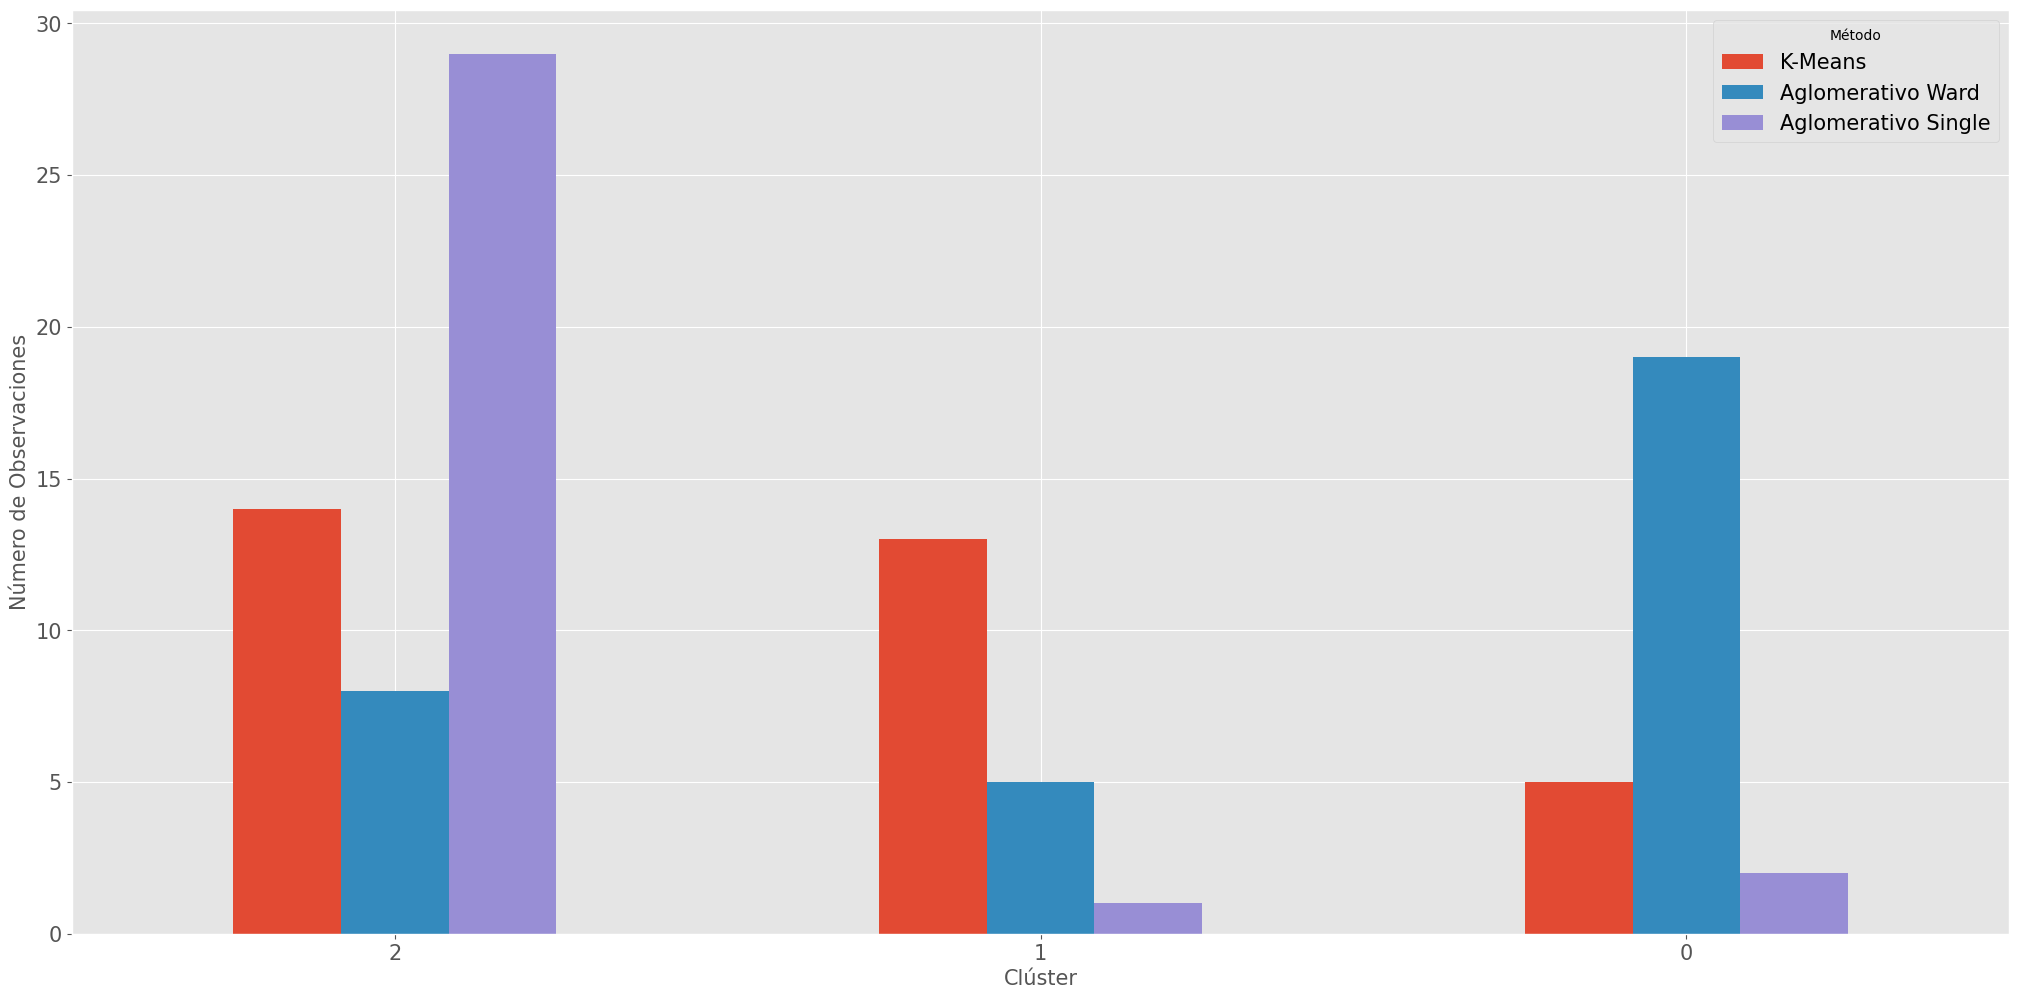

In [117]:
#Llamado de los diferentes métodos que se aplicaron
kmean = pd.Series(kmeans_model_3D.labels_).value_counts()
aglomerativo_ward = pd.Series(model_ward.labels_).value_counts()
aglomerativo_single = pd.Series(model_single.labels_).value_counts()

# Fusiòn los resultados
aglomerativo = pd.merge(aglomerativo_ward, aglomerativo_single, left_index=True, right_index=True)
comp_metodos = pd.merge(kmean, aglomerativo, left_index=True, right_index=True)

# Etiquetas
comp_metodos.columns = ["K-Means", "Aglomerativo Ward", "Aglomerativo Single"]

# Graficar los datos
ax = comp_metodos.plot.bar()
ax.set_xlabel("Clúster", fontsize=15)
ax.set_ylabel("Número de Observaciones", fontsize=15)
ax.legend(title="Método", fontsize=15) 
plt.xticks(rotation=0, fontsize=15) 
plt.yticks(fontsize=15)

plt.show()

#### Se puede observar cómo k-means distribuye de forma más uniforme los datos, mientras que los métodos aglomerativos tienden a concentrar mayor cantidad de datos en un sólo grupo.

# 4. Características más representativas para cada cluster


### Análisis basado en los clusters de la implementación de K-Means

In [37]:
# Cluster 0
cluster_0 = latam_forest_area[latam_forest_area['cluster'] == 0]
cluster_0.drop('cluster', axis=1).describe()

,HDI Rank (2018),avg_per_country,net_change_per_country
count,13.000000,13.000000,1.300000e+01
mean,68.461538,29.955944,1.502098e+00
std,16.353467,14.097242,4.346309e+00
min,42.000000,9.027273,-1.954545e+00
25%,57.000000,22.318182,-1.427273e+00
50%,68.000000,31.218182,-1.421085e-14
75%,76.000000,35.672727,1.818182e+00
max,96.000000,51.400000,1.277273e+01


In [38]:
# Cluster 1
cluster_1 = latam_forest_area[latam_forest_area['cluster'] == 1]
cluster_1.drop('cluster', axis=1).describe()

,HDI Rank (2018),avg_per_country,net_change_per_country
count,14.000000,14.000000,14.000000
mean,92.428571,61.700649,-3.327922
std,15.189644,14.301040,3.586284
min,67.000000,43.718182,-9.581818
25%,79.750000,53.197727,-4.997727
50%,95.000000,59.604545,-4.022727
75%,98.000000,63.470455,-0.534091
max,123.000000,98.481818,3.836364


In [39]:
# Cluster 2
cluster_2 = latam_forest_area[latam_forest_area['cluster'] == 2]
cluster_2.drop('cluster', axis=1).describe()

,HDI Rank (2018),avg_per_country,net_change_per_country
count,5.000000,5.000000,5.000000
mean,135.400000,26.556364,-8.823636
std,19.021041,18.090834,8.537043
min,124.000000,3.736364,-22.809091
25%,126.000000,14.427273,-8.963636
50%,126.000000,28.536364,-8.109091
75%,132.000000,36.190909,-3.772727
max,169.000000,49.890909,-0.463636


### Observaciones más cercanas a cada centroide 

In [40]:
closest, _ = pairwise_distances_argmin_min(forest_area_3F_centroids, latam_forest_area.drop('cluster', axis=1))
closest

array([10, 11, 22])

##### Observación más cercana al centroide del cluster 0

In [41]:
print(tabulate(latam_forest_area.iloc[[closest[0]]], headers = 'keys', tablefmt = 'orgtbl'))

|    |   HDI Rank (2018) |   avg_per_country |   net_change_per_country |   cluster |
|----+-------------------+-------------------+--------------------------+-----------|
| 10 |                72 |           26.7364 |                  7.53636 |         0 |


##### Observación más cercana al centroide del cluster 1

In [42]:
print(tabulate(latam_forest_area.iloc[[closest[1]]], headers = 'keys', tablefmt = 'orgtbl'))

|    |   HDI Rank (2018) |   avg_per_country |   net_change_per_country |   cluster |
|----+-------------------+-------------------+--------------------------+-----------|
| 11 |                98 |           60.4818 |                 -6.21818 |         1 |


##### Observación más cercana al centroide del cluster 2

In [43]:
print(tabulate(latam_forest_area.iloc[[closest[2]]], headers = 'keys', tablefmt = 'orgtbl'))

|    |   HDI Rank (2018) |   avg_per_country |   net_change_per_country |   cluster |
|----+-------------------+-------------------+--------------------------+-----------|
| 22 |               126 |           28.5364 |                 -8.96364 |         2 |


### **Características representativas de las clusters**

A continuación se presentan las características y el elemento más representativo de cada cluster:

##### **cluster_0:**
* Cantidad de elementos: 13
* avg_per_country: min = 9.027273, max = 51.400000
* net_change_per_country: min = -1.954545, max = 12.77273
    
    Elemento
* HDI Rank (2018) = 72
* avg_per_country = 26.7364
* net_change_per_country = 7.53636  

Se caracteriza por tener la mayor cantidad de valores positivos en el cambio neto del porcentaje de territorio forestal. Los países en este cluster tienden a tener un HDI medio.

##### **cluster_1:**
* Cantidad de elementos: 14
* avg_per_country: min = 43.718182, max = 98.481818
* net_change_per_country: min = -9.581818, max = 3.836364
    
    Elemento
* HDI Rank (2018) = 98
* avg_per_country = 60.4818 
* net_change_per_country = -6.21818

Se caracteriza por tener el mayor promedio de porcentaje de territorio forestal y a su vez un porcentaje de deforestación significativo a través de los años.

##### **cluster_2:**
* Cantidad de elementos: 5
* avg_per_country: min = 3.736364, max = 49.890909
* net_change_per_country: min = -22.809091, max = -0.463636
    
    Elemento
* HDI Rank (2018) = 126
* avg_per_country = 28.5364 
* net_change_per_country = -8.96364

Se caracteriza por tener el cambio neto negativo más alto y el mayor valor en el HDI Rank, lo que indica menor HDI en comparación con los demás clusters.

##### Como se puede evidenciar, en cada uno de los clusters los elementos más representativos se encuentran dentro de los intervalos de datos obtenidos en los estadísticos descriptivos.

In [44]:
# Unir los datos de latam_forest_area con los nombres de los países y las etiquetas de los clusters

latam_forest_area = pd.merge(
    latam_forest_area, 
    latam_and_cab_forest_area2[['Country']], 
    left_index=True, 
    right_index=True, 
    how='left'
)

In [45]:
# Ordenar los datos por cluster

latam_forest_area.sort_values('cluster')

,HDI Rank (2018),avg_per_country,net_change_per_country,cluster,Country
0,74.0,22.509091,-8.909091e-01,0,Antigua and Barbuda
30,57.0,9.027273,4.427273e+00,0,Uruguay
12,89.0,35.672727,1.277273e+01,0,Dominican Republic
10,72.0,26.736364,7.536364e+00,0,Cuba
9,68.0,51.227273,1.027273e+00,0,Costa Rica
21,76.0,34.472727,-1.427273e+00,0,Mexico
7,42.0,22.318182,1.818182e+00,0,Chile
26,89.0,34.045455,-1.654545e+00,0,Saint Lucia
29,63.0,45.354545,-1.545455e+00,0,Trinidad and Tobago
3,56.0,14.700000,0.000000e+00,0,Barbados


# 5. Análisis de 5 tendencias encontradas en los datos

1. Se puede notar que países como Guyana y Suriname tienen una alta proporción de su territorio cubierto de árboles. Además, en comparación con otros países, tienen poblaciones relativamente pequeñas y bajas densidades poblacionales. Por esta razón, los resultados muestran valores atípicos evidenciados en cada uno de los puntos anteriores.

2. Se observa que los países con la misma posición en el ranking del Índice de Desarrollo Humano (HDI) tienden a agruparse en el mismo clúster debido a las similitudes en sus porcentajes de áreas forestales y tasas de deforestación. Por ejemplo, en el clúster 1 con Suriname, Paraguay y Dominica con un HDI de 98 y en el clúster 2 con Guatemala y Nicaragua que tienen un HDI de 126. Esto sugiere que estos países podrían compartir características comunes en términos de políticas ambientales, desarrollo económico y prácticas de uso de la tierra.

3. Los países agrupados en el clúster 1 tienen en común un promedio superior al 40% y, en su mayoría, el cambio neto arroja un valor negativo. Esto podría sugerir que, a pesar de contar con una amplia cobertura forestal, estos países están enfrentando desafíos en términos de desarrollo o crecimiento sostenible.

4. Llama la atención que solo ocho países del conjunto de datos obtuvieron un cambio neto positivo, ya sea porque el porcentaje del territorio se mantuvo igual (Barbados y Grenada) o porque aumentó significativamente (Cuba, Uruguay y Saint Vincent and the Grenadines). De esto se puede resaltar que la región en la que están ubicados los países no determina si están mejor o peor en términos de políticas de conservación ambiental, dado que dentro de este conjunto se encuentran también Chile, Costa Rica y Dominican Republic.

5. Pocos países se han mantenido con un porcentaje de forestación estable (como en el caso de Suriname y Guyana), lo que sugiere que aquellos países con inestabilidad no han logrado avances significativos en la protección de sus bosques. Esto puede deberse a la falta de recursos, políticas ineficaces o presiones económicas que priorizan el desarrollo a corto plazo sobre la sostenibilidad ambiental.

    Como se mencionó con anterioridad, hay diferencias notables en los HDI entre países de diferentes regiones, lo que refleja las disparidades en el desarrollo económico y social en Latinoamérica. Estas disparidades también se manifiestan en la gestión de los recursos naturales, donde algunos países han logrado equilibrar el desarrollo económico con la conservación ambiental, mientras que otros continúan enfrentando desafíos significativos en este ámbito.

6. En el conjunto de datos se observa que para el año 1990, Colombia tenía un porcentaje de territorio forestal del 58.1%. En el año final de los registros, los datos indicaron una deforestación del 4.1% durante casi tres décadas. Aunque este porcentaje puede parecer bajo considerando el transcurso de los años, es importante destacar que durante el período de 2011 a 2014, el valor total del territorio se mantuvo en un 52.8%. Esto nos permite afirmar que fue algo positivo en términos de conservación ambiental ya que contribuyó a que no se experimentara un porcentaje de deforestación más alta en los años venideros.